### data without outliers

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
newd = pd.read_csv('outlier_filtered_with_lying_down.csv')

In [4]:
newd.posture.value_counts()

lying_down          13206
sitting               551
standing+walking      342
Name: posture, dtype: int64

In [5]:
def activity_selection(df_ecg):
    df_ecg.loc[(df_ecg['activity']=='AdministrativeWork') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='RecreationalActivities(Active)') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='HouseholdActivities') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='DeskWork') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='WatchingTV') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='Transportation(Active)') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='Eating/Drinking') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='Reading/Internet/OtherRecreativePCUse') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='Telephone/TalkingPrivate') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='RecreationalActivities(Passive)') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='RecreationalActivities') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='Transportation(Active)') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='Transportation(Passive)') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='Intervention') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.loc[(df_ecg['activity']=='PhysicalWork') & (df_ecg['posture'] != 'standing+walking'), ['posture']] = 'standing+walking'
    df_ecg.loc[(df_ecg['activity']=='Telephone/TalkingAtWork') & (df_ecg['posture'] != 'sitting'), ['posture']] = 'sitting'
    df_ecg.drop(df_ecg.loc[df_ecg['activity']== 'Unknown'].index, inplace=True)
    #df_ecg = df_ecg.loc[(df_ecg['posture'] == 'sitting') | (df_ecg['posture'] == 'lying_down')]
    df_ecg = df_ecg.reset_index()
    df_ecg = df_ecg.drop('index', axis=1)
    return df_ecg

In [6]:
newd  = activity_selection(newd)
newd.posture.value_counts()

lying_down          13206
sitting               551
standing+walking      342
Name: posture, dtype: int64

In [7]:
#df1['Average_HR_bpm'].groupby("posture", as_index=False).shift(-1)
newd['lagg_HR'] = newd['Average_HR_bpm'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['next_HR'] = newd['Average_HR_bpm'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['2lagg_HR'] = newd['lagg_HR'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['2next_HR'] = newd['next_HR'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['3lagg_HR'] = newd['2lagg_HR'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['3next_HR'] = newd['2next_HR'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['4lagg_HR'] = newd['3lagg_HR'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['4next_HR'] = newd['3next_HR'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['5lagg_HR'] = newd['4lagg_HR'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['5next_HR'] = newd['4next_HR'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

In [8]:
#df1['Average_HR_bpm'].groupby("posture", as_index=False).shift(-1)
newd['lagg_RMS'] = newd['Average_Mot_mg'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['next_RMS'] = newd['Average_Mot_mg'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['2lagg_RMS'] = newd['lagg_RMS'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['2next_RMS'] = newd['next_RMS'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

newd['3lagg_RMS'] = newd['2lagg_RMS'].groupby(newd['posture']).shift(1)
newd = newd.fillna(method='bfill')

newd['3next_RMS'] = newd['2next_RMS'].groupby(newd['posture']).shift(-1)
newd = newd.fillna(method='ffill')

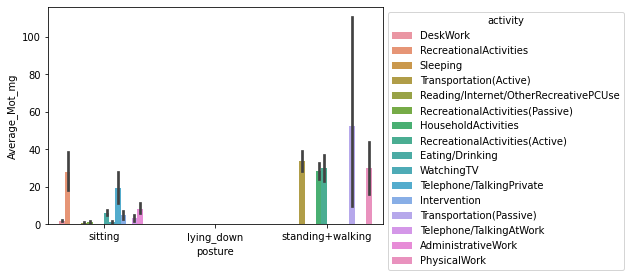

In [9]:
ax = sns.barplot(data=newd, x="posture", y="Average_Mot_mg", hue="activity")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [10]:
newd.Average_Mot_mg.describe()

count    14099.000000
mean         1.059808
std          7.022318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        191.890000
Name: Average_Mot_mg, dtype: float64

In [11]:
cols = [ 'Average_Mot_mg', '2lagg_RMS', '2next_RMS', '3lagg_HR', '3next_HR']

dfx = newd[cols]
dfx

,Average_Mot_mg,2lagg_RMS,2next_RMS,3lagg_HR,3next_HR
0,0.53,0.53,1.06,65.95,63.31
1,1.89,0.53,0.24,65.95,76.89
2,1.06,0.53,1.77,65.95,69.83
3,0.24,1.89,0.24,65.95,71.13
4,1.77,1.06,0.00,62.04,73.89
...,...,...,...,...,...
14094,0.00,0.00,0.00,60.11,59.75
14095,0.00,0.00,0.00,60.62,61.61
14096,0.00,0.00,0.00,60.99,61.61
14097,0.00,0.00,0.00,60.88,61.61


In [12]:
y = newd.pop('posture')

In [13]:
x = np.array(dfx)
x.shape

(14099, 5)

### Plot learning curve

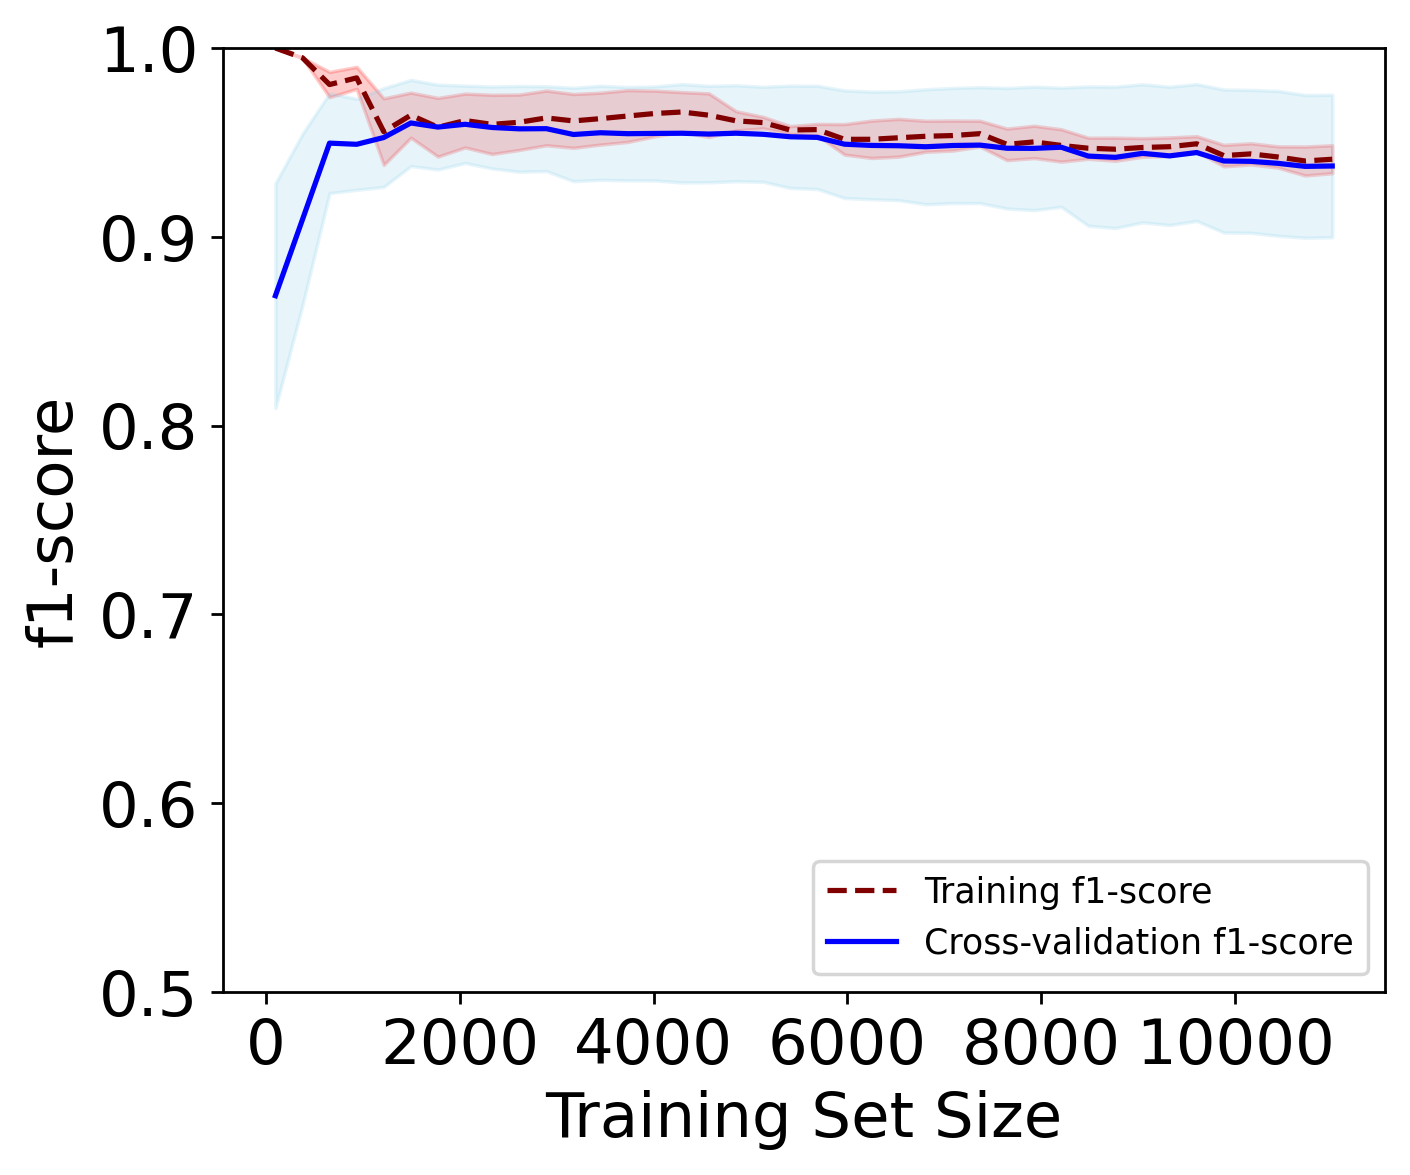

In [40]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle = False)
kfold

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split= 20, max_leaf_nodes= 20, 
                               bootstrap = True, random_state=42, class_weight = 'balanced')

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf, x, y, 
                                    cv=KFold(n_splits=5, shuffle = False), scoring='f1_weighted', 
                                                        n_jobs=-1, train_sizes=np.linspace(100, 11000, num=40, dtype = int))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.rcParams['figure.dpi'] = 250

plt.subplots(1, figsize=(6,5))
plt.plot(train_sizes, train_mean, '--', color="maroon",  label="Training f1-score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation f1-score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="red", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="skyblue", alpha=0.2)
#plt.xlim(100, 11000)
plt.ylim(0.5, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title("Learning Curve")
plt.xlabel("Training Set Size", fontsize=18), plt.ylabel("f1-score", fontsize=18), plt.legend(loc="lower right")
plt.savefig('RF learning curve new.png', bbox_inches='tight')

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html#sphx-glr-auto-examples-ensemble-plot-forest-iris-py

### PLot decision boundary

In [14]:

from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

kfold = KFold(n_splits=5, shuffle = False)

for i, (train_idx, test_idx) in enumerate(kfold.split(x, y)):

    #get train/test split for current fold
    X_train, y_train = x[train_idx], y[train_idx]
    X_test, y_test = x[test_idx], y[test_idx]
    
    # standardization
    #scaler = StandardScaler()
    #scaler.fit(X_train)
    #X_train_data_lr_1 = scaler.transform(X_train)
    #X_test_data_lr_1 = scaler.transform(X_test)

In [15]:
#b, y_np = np.unique(y, return_inverse=True)

In [19]:
b, y_np = np.unique(y_train, return_inverse=True)
b, y_ns = np.unique(y_test, return_inverse=True)

Text(0, 0.5, '2next RMS (g)')

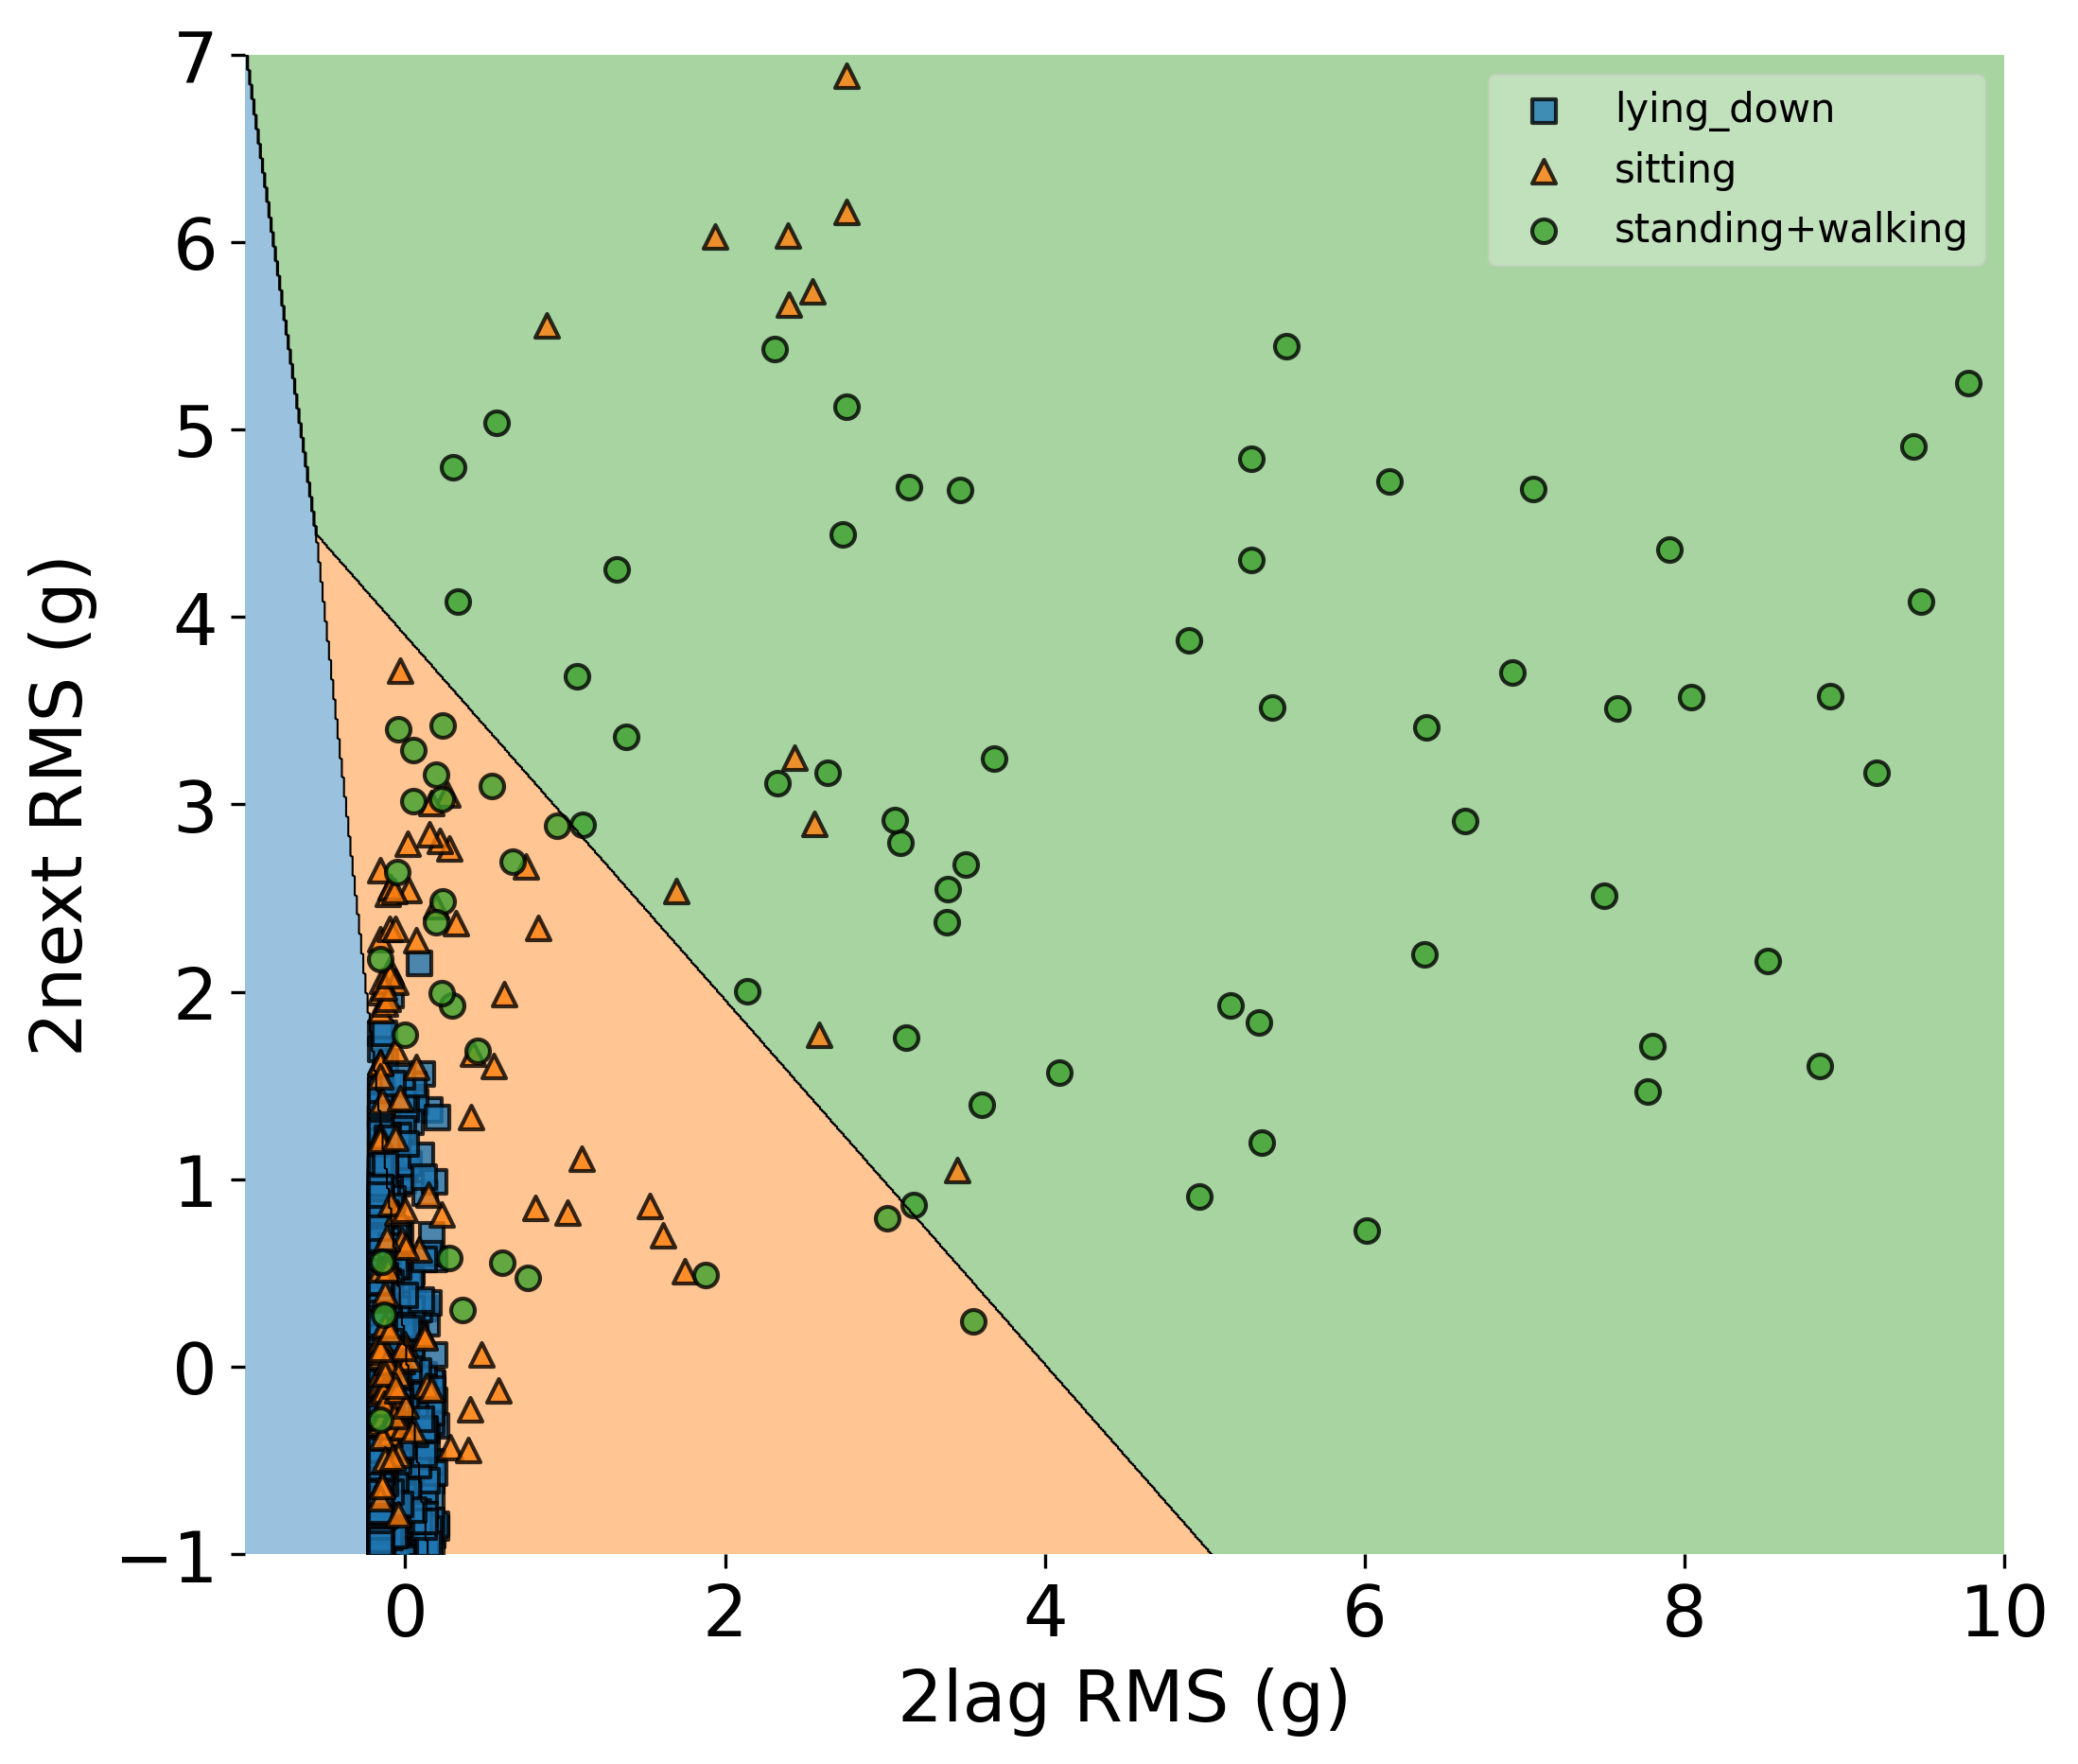

In [20]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
# Initializing Classifiers


# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr_1 = scaler.transform(X_train)
X_test_data_lr_1 = scaler.transform(X_test)

clf1 = LogisticRegression(random_state=55, class_weight = 'balanced')
#clf2 = RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split= 20, max_leaf_nodes= 20, 
                           #bootstrap = True, random_state=55, class_weight = 'balanced')
#clf3 = SVC(C = 0.01, kernel = 'rbf', random_state = 3, class_weight='balanced')

clf1.fit(X_train_data_lr_1[:, [1,3]], y_np)

plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(8, 7))
fig = plot_decision_regions(X=X_test_data_lr_1[:, [1,3]], y=y_ns, clf=clf1, legend=2, zoom_factor=1.)
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, ['lying_down', 'sitting', 'standing+walking'], framealpha=0.3, scatterpoints=1)
#plt.title('Logistic Regression')
plt.xlim(-1, 10)
plt.ylim(-1, 7)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('2lag RMS (g)', fontsize=18)
plt.ylabel('2next RMS (g)', fontsize=18)
#plt.savefig('Logistic regression DB', bbox_inches='tight')

In [21]:
X_test_data_lr_1[:, [3]].max()

7.692520182082342

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
# Initializing Classifiers

#clf1 = LogisticRegression(random_state=55, class_weight = 'balanced')
clf2 = RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split= 20, max_leaf_nodes= 20, 
                               bootstrap = True, random_state=55, class_weight = 'balanced')
#clf3 = SVC(C = 0.01, kernel = 'rbf', random_state = 3, class_weight='balanced')

clf2.fit(X_train_data_lr_1[:, [1,3]], y_np)
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(8, 7))
fig = plot_decision_regions(X=X_test_data_lr_1[:, [1,3]], y=y_ns, clf=clf2, legend=2, zoom_factor=1.)
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, ['lying_down', 'sitting', 'standing+walking'], framealpha=0.3, scatterpoints=1)
#plt.title('Random Forest')
plt.xlim(-1, 10)
plt.ylim(-1, 7)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('2lag RMS (g)', fontsize=18)
plt.ylabel('2next RMS (g)', fontsize=18)
#plt.savefig('Random forest DB', bbox_inches='tight')

In [ ]:
X_train[:, 2].min()

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
# Initializing Classifiers

#clf1 = LogisticRegression(random_state=55, class_weight = 'balanced')
#clf2 = RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split= 20, max_leaf_nodes= 20, 
                               #bootstrap = True, random_state=55, class_weight = 'balanced')
clf3 = SVC(C = 0.01, kernel = 'linear', random_state = 3, class_weight='balanced')

clf3.fit(X_train_data_lr_1[:, [1,3]], y_np)
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(8, 7))
ax = plt.gca()
plot_decision_regions(X=X_test_data_lr_1[:, [1,3]], y=y_ns, clf=clf3, legend=2, zoom_factor=1., ax=ax)

colr = 'support-vector'
ax.scatter(
    clf3.support_vectors_[:, 0],
    clf3.support_vectors_[:, 1],
    s=20,
    linewidth=0.2,
    facecolors="none",
    edgecolors="r",
     label=labels
    
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['lying_down', 'sitting', 'standing+walking', 'support vectors'], framealpha=0.3, scatterpoints=1)


#plt.title('SVM')
plt.xlim(-1, 10)
plt.ylim(-1, 7)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('2lag RMS (g)', fontsize=18)
plt.ylabel('2next RMS (g)', fontsize=18)
#plt.savefig('SVM DB', bbox_inches='tight')

https://stats.stackexchange.com/questions/220827/how-to-know-if-a-learning-curve-from-svm-model-suffers-from-bias-or-variance

### RF model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
plt.rcParams['figure.dpi'] = 70

def training_evaluation(ypred, ytrue, i, accuracy = [], score = []):
    # compute accuracy by averaging the predicted class over the whole time series
    m1 = f1_score(ytrue, ypred, average='weighted', zero_division = 0)
    score.append(m1)
    a1 =  accuracy_score(ytrue, ypred)
    accuracy.append(a1)
    print(f"\n -------------Classification Report for Training CV #{i}-------------\n")
    print(classification_report(ytrue, ypred))

    labels = ['lying_down', 'sitting', 'standing+walking']
    confusion_matrix_1 = confusion_matrix(ytrue, ypred)
    sns.heatmap(confusion_matrix_1, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
    plt.title(f'Training confusion matrix for cv #{i}', fontsize = 15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    return score, accuracy

In [ ]:
plt.rcParams['figure.dpi'] = 70

def validation_evaluation(ypred, ytrue, i, accuracy = [], score = []):
    # compute accuracy by averaging the predicted class over the whole time series
    m1 = f1_score(ytrue, ypred, average='weighted', zero_division = 0)
    score.append(m1)
    a1 =  accuracy_score(ytrue, ypred)
    accuracy.append(a1)
    print(f"\n -------------Classification Report for validation CV #{i}-------------\n")
    print(classification_report(ytrue, ypred))

    labels = ['lying_down', 'sitting', 'standing+walking']
    confusion_matrix_1 = confusion_matrix(ytrue, ypred)
    sns.heatmap(confusion_matrix_1, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
    plt.title(f'Validation confusion matrix for cv #{i}', fontsize = 15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    return score, accuracy

In [ ]:

kfold = KFold(n_splits=5, shuffle = False)
# Dataframe with misclassified examples
misclf_df = pd.DataFrame(
    {
        'folds' : np.zeros(x.shape[0]), 
        'is_misclassified' : np.zeros(x.shape[0])
    },
)

idx_tr, idx_val, outs = [], [], []
for i, (train_idx, test_idx) in enumerate(kfold.split(x, y)):

    #get train/test split for current fold
    X_train, y_train = x[train_idx], y[train_idx]
    X_test, y_test = x[test_idx], y[test_idx]
    idx_tr.append(train_idx)
    idx_val.append(test_idx)

    #value: 0.8740752531004241| params: {'n_estimators': 800, 'max_depth': 7, 'min_samples_split': 30, 'max_leaf_nodes': 50, 'max_features': 'sqrt'}
    #n_estimators=500, max_depth=6, min_samples_split= 20, max_leaf_nodes= 20, bootstrap = True, random_state=42, class_weight = 'balanced'
    #value: 0.8829431088234678| params: {'n_estimators': 700, 'max_depth': 9, 'min_samples_split': 30, 'max_leaf_nodes': 20, 'max_features': 3}

###random forest model
    clf=RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split= 20, max_leaf_nodes= 20, 
                               bootstrap = True, random_state=42, class_weight = 'balanced')
    
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    outs.append(y_pred)
    # write results
    misclf_df.loc[test_idx, 'folds'] = i
    misclf_df.loc[test_idx, 'is_misclassified'] = clf.predict(X_test) != y_test
    accuracy_tr, f1_tr = training_evaluation(y_pred_train, y_train, i)
    acc_val, f1_val = validation_evaluation(y_pred, y_test, i)

print('Training mean accuracy', np.mean(accuracy_tr))
print('Training mean f1-score', np.mean(f1_tr))
print('Validation mean accuracy', np.mean(acc_val))
print('Validation mean f1-score', np.mean(f1_val))

f1_score_cv = np.mean(f1_val)
print(f'Mean f1-score per trial is ',f1_score_cv)


In [ ]:
y_fin_pred = np.concatenate(outs)
y_fin_pred.shape

newd['pred'] = y_fin_pred
missclass = newd.loc[newd['posture'] != newd['pred']]
missclass = missclass.reset_index()
missclass = missclass.drop('index', axis=1)
missclass

In [ ]:
a = missclass.posture.value_counts().values
x = newd.posture.value_counts().values
c = (a /x) *100

cols = ['lying_down', 'sitting', 'standing+walking']
b = pd.DataFrame(c, index = cols)

b = b.rename(columns = {0: 'percent'})
plt.rcParams['figure.dpi'] = 150
plt.figure(figsize=(4, 4))
ax = sns.barplot(y = 'percent', x=b.index, data=b)
ax.set_ylabel('Percent %')
ax.set_ylim(0, 31)
plt.savefig('rf all missclassified by posture', bbox_inches='tight')

In [ ]:
b, c = np.unique(y_train, return_inverse=True)

In [ ]:
#y_train_bin = np.where(y_train == 'sitting', 0, 1)
clf = RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split= 20, max_leaf_nodes= 20, 
                               bootstrap = True, random_state=42, class_weight = 'balanced')
clf.fit(X_train[:, [1,3]], c)

In [ ]:
from matplotlib.colors import ListedColormap

# seting x_train and y_train
x_set, y_set = X_test[:, [1, 4]], y_test  
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step=0.01),  
np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))  

# ploting 
plt.rcParams['figure.dpi'] = 450
plt.figure(figsize=(8, 4))
plt.contourf(x1, x2, clf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('maroon','steelblue', 'black')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

# for loop to iterate the data
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('pink', 'green', 'orange'))(i), label = j, alpha =.5) 
    # labeling the graph
#plt.title('Logistic Regression (Training set)')  
plt.xlabel('2 lag RMS (g)')  
plt.ylabel('3 lag HR (bpm)')  
plt.legend()
#plt.savefig('Logistic regression training set.png', bbox_inches='tight')


In [ ]:
print('Training mean accuracy', np.mean(accuracy_tr))
print('Training mean f1-score', np.mean(f1_tr))
print('Validation mean accuracy', np.mean(acc_val))
print('Validation mean f1-score', np.mean(f1_val))

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
fn=cols
cn=idx
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[1],
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [ ]:
kfold = KFold(n_splits=5, shuffle = False)
# Dataframe with misclassified examples
misclf_df = pd.DataFrame(
    {
        'folds' : np.zeros(x.shape[0]), 
        'is_misclassified' : np.zeros(x.shape[0])
    },
)

idx_tr, idx_val = [], []
for i, (train_idx, test_idx) in enumerate(kfold.split(x, y)):

    #get train/test split for current fold
    X_train, y_train = x[train_idx], y[train_idx]
    X_test, y_test = x[test_idx], y[test_idx]
    idx_tr.append(train_idx)
    idx_val.append(test_idx)

    #value: 0.8740752531004241| params: {'n_estimators': 800, 'max_depth': 7, 'min_samples_split': 30, 'max_leaf_nodes': 50, 'max_features': 'sqrt'}
    #n_estimators=500, max_depth=6, min_samples_split= 20, max_leaf_nodes= 20, bootstrap = True, random_state=42, class_weight = 'balanced'
    #value: 0.8829431088234678| params: {'n_estimators': 700, 'max_depth': 9, 'min_samples_split': 30, 'max_leaf_nodes': 20, 'max_features': 3}

###random forest model
    clf=RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split= 20, max_leaf_nodes= 20, 
                               bootstrap = True, random_state=42, class_weight = 'balanced')
    
    clf.fit(X_train, y_train)

In [ ]:
cols = ['Combined RMS','2lagg_RMS', '2next_RMS', '3lagg_HR', '3next_HR']
idx = ['lying_down', 'sitting', 'standing+walking']

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2, scoring='f1_weighted')
forest_importances = pd.Series(result.importances_mean, index=cols)

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(5, 4))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, color = 'lightgreen')
#ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean f1-score decrease", fontsize=12)
ax.set_ylim(0, 0.031)
fig.tight_layout()
plt.savefig('RF feature importance.png', bbox_inches='tight')

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import itertools

ts_cv = TimeSeriesSplit(n_splits= 5, max_train_size = 700)
all_splits = list(ts_cv.split(x, y))

# Dataframe with misclassified examples
misclf_df = pd.DataFrame(
    {
        'folds' : np.zeros(x.shape[0]), 
        'is_misclassified' : np.zeros(x.shape[0])
    },
)

idx_tr, idx_val = [], []
for i, (train_idx, test_idx) in enumerate(all_splits):
    X_train, y_train = x[train_idx], y[train_idx]
    X_test, y_test = x[test_idx], y[test_idx]
    
    idx_tr.append(train_idx)
    idx_val.append(test_idx)
    
###random forest model
    clf=RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split= 20, 
                               max_leaf_nodes= 20, bootstrap = True,
                                random_state=42)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_test)

    # write results
    misclf_df.loc[test_idx, 'folds'] = i
    misclf_df.loc[test_idx, 'is_misclassified'] = clf.predict(X_test) != y_test
    accuracy_tr, f1_tr = training_evaluation(y_pred_train, y_train, i)
    acc_val, f1_val = validation_evaluation(y_pred, y_test, i)

print('Training mean accuracy', np.mean(accuracy_tr))
print('Training mean f1-score', np.mean(f1_tr))
print('Validation mean accuracy', np.mean(acc_val))
print('Validation mean f1-score', np.mean(f1_val))

f1_score_cv = np.mean(f1_val)
print(f'Mean f1-score per trial is ',f1_score_cv)

In [ ]:
f_i = list(zip(dfx, clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

### TESTING SET

In [ ]:
clf=RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split= 20, max_leaf_nodes= 20, 
                               bootstrap = True, random_state=42, class_weight = 'balanced')
clf.fit(x, y)

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model_rf.sav'
pickle.dump(clf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
test_set = pd.read_csv('final_test_set_lyingdown.csv')

test_set['2lagg_HR'] = test_set['lagg_HR'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['2next_HR'] = test_set['next_HR'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')

test_set['3lagg_HR'] = test_set['2lagg_HR'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['3next_HR'] = test_set['2next_HR'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')

test_set['4lagg_HR'] = test_set['3lagg_HR'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['4next_HR'] = test_set['3next_HR'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')

test_set['5lagg_HR'] = test_set['4lagg_HR'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['5next_HR'] = test_set['4next_HR'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')


#df1['Average_HR_bpm'].groupby("posture", as_index=False).shift(-1)
test_set['lagg_RMS'] = test_set['Average_Mot_mg'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['next_RMS'] = test_set['Average_Mot_mg'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')

test_set['2lagg_RMS'] = test_set['lagg_RMS'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['2next_RMS'] = test_set['next_RMS'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')

test_set['3lagg_RMS'] = test_set['2lagg_RMS'].groupby(test_set['posture']).shift(1)
test_set = test_set.fillna(method='bfill')

test_set['3next_RMS'] = test_set['2next_RMS'].groupby(test_set['posture']).shift(-1)
test_set = test_set.fillna(method='ffill')

cols = ['Average_Mot_mg', '2lagg_RMS', '2next_RMS', '3lagg_HR', '3next_HR']
dfx = test_set[cols]

y_test = test_set.pop('posture')

x_test = np.array(dfx)
x_test.shape

In [ ]:
loaded_model.predict(x_test)

In [ ]:
loaded_model.score(x_test, y_test)

In [ ]:
ypred = loaded_model.predict(x_test)

In [ ]:
m1 = f1_score(y_test, ypred, average = 'weighted', zero_division = 0)
a1 =  accuracy_score(y_test, ypred)
print("\n -------------Classification Report for Test set-------------\n")
print(classification_report(y_test, ypred))

labels = ['lyng_down','sitting', 'standing+walking']
confusion_matrix_1 = confusion_matrix(y_test, ypred)
sns.heatmap(confusion_matrix_1, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix for test set', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
m1

### Checking misclassified samples in the test set

In [ ]:
misclf_df = pd.DataFrame(
    {
        'is_misclassified' : np.zeros(x_test.shape[0])
    },
)

# write results
misclf_df.loc[test_set.index, 'is_misclassified'] = clf.predict(x_test) != y_test

In [ ]:
list1 = y_test.index
y_pred_df = pd.DataFrame(ypred, columns = {'y_pred'})
y_pred_df = y_pred_df.set_index(list1)
pred_posture = y_pred_df.loc[misclf_df.loc[(misclf_df['is_misclassified'] == True)].index, 'y_pred']

In [ ]:
y_test_df = pd.DataFrame(y_test.values, columns = {'y_test'})
y_test_df = y_test_df.set_index(list1)
true_posture = y_test_df.loc[misclf_df.loc[(misclf_df['is_misclassified'] == True)].index, 'y_test']

In [ ]:
residuals = newd.loc[misclf_df.loc[(misclf_df['is_misclassified'] == True)].index]
residuals = residuals.reset_index()
residuals = residuals.drop('index', axis =1)
residuals['pred_posture'] = pred_posture.values
residuals['true_posture'] = true_posture.values
residuals

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(6, 4))
g = sns.FacetGrid(residuals, col="true_posture", hue="pred_posture")
g.map(sns.scatterplot, "lagg_RMS", "2next_HR", alpha=.7)
g.add_legend()
new_title = 'Predicted posture'
g._legend.set_title(new_title)
g.axes[0,0].set_xlabel('Overall RMS (g)', fontsize=10)
g.axes[0,1].set_xlabel('Overall RMS (g)', fontsize=10)
g.axes[0,0].set_ylabel('lagg_HR heart rate (bpm)', fontsize=10)

# Legend title
g.legend.get_title().set_fontsize(10)
# Legend texts
for text in g.legend.texts:
    text.set_fontsize(10)

plt.subplots_adjust(hspace=0.4, wspace=0.3)    

### Check misclassified samples of validation set

In [ ]:
list1 = y_test.index
len(y_test)

y_pred_df = pd.DataFrame(y_pred, columns = {'y_pred'})
y_pred_df = y_pred_df.set_index(list1)
pred_posture = y_pred_df.loc[misclf_df.loc[(misclf_df['folds'] == 4.0) & (misclf_df['is_misclassified'] == True)].index, 'y_pred']

y_test_df = pd.DataFrame(y_test.values, columns = {'y_test'})
y_test_df = y_test_df.set_index(list1)
true_posture = y_test_df.loc[misclf_df.loc[(misclf_df['folds'] == 4.0) & (misclf_df['is_misclassified'] == True)].index, 'y_test']

residuals = newd.loc[misclf_df.loc[(misclf_df['folds'] == 4.0) & (misclf_df['is_misclassified'] == True)].index]
residuals = residuals.reset_index()
residuals = residuals.drop('index', axis =1)
residuals['pred_posture'] = pred_posture.values
residuals['true_posture'] = true_posture.values
residuals

In [ ]:
ytrue = y[misclf_df.loc[(misclf_df['folds'] == 4.0) & (misclf_df['is_misclassified'] == True)].index]
list1 = ytrue.index
ytrue = pd.DataFrame(ytrue.values, columns = {'y_true'})
ytrue = ytrue.set_index(list1)

In [ ]:
len(ytrue)

In [ ]:
ypred = np.where(ytrue == 'sitting', 'standing+walking', 'sitting')
ypred = pd.DataFrame(ypred, columns = {'y_pred'})
ypred = ypred.set_index(list1)
len(ypred)

In [ ]:
residuals = newd.loc[misclf_df.loc[(misclf_df['folds'] == 4.0) & (misclf_df['is_misclassified'] == True)].index]
residuals = residuals.reset_index()
residuals = residuals.drop('index', axis =1)
residuals['Predicted posture'] = ypred['y_pred'].values
residuals['True posture'] = ytrue['y_true'].values
residuals

### Plot misclassified samples

In [ ]:
X_test

In [ ]:
y_train_bin = np.where(y_train == 'sitting', 0, 1)

In [ ]:
clf=RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split= 20, 
                               max_leaf_nodes= 20, bootstrap = True,
                                random_state=42, class_weight = 'balanced')
clf.fit(X_train[:, :2], y_train_bin)

In [ ]:
from matplotlib.colors import ListedColormap

# seting x_train and y_train
x_set, y_set = X_test[:, :2], y_test  
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step=0.01),  
np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))  

# ploting 
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(8, 4))
plt.contourf(x1, x2, clf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('maroon','steelblue')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

# for loop to iterate the data
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('pink', 'darkslategrey'))(i), label = j) 
    # labeling the graph
#plt.title('Logistic Regression (Training set)')  
plt.xlabel('Overall RMS (g)')  
plt.ylabel('Mean heart rate (bpm')  
plt.legend()
#plt.savefig('Logistic regression training set.png', bbox_inches='tight')

In [ ]:
plt.rcParams['figure.dpi'] = 100
ax = sns.barplot(data=newd, x="posture", y="2lagg_RMS",  palette = 'tab10')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(8, 5))
g = sns.FacetGrid(residuals, col="true_posture", hue="pred_posture")
g.map(sns.scatterplot, "2lagg_RMS", "2next_RMS", alpha=.7)
g.add_legend()
new_title = 'Predicted posture'
g._legend.set_title(new_title)
g.axes[0,0].set_xlabel('2 lag RMS (g)', fontsize=12)
g.axes[0,1].set_xlabel('2 lag RMS (g)', fontsize=12)
g.axes[0,1].set_xlabel('2 lag RMS (g)', fontsize=12)

g.axes[0,0].set_ylabel('2 next RMS (g)', fontsize=12)

# Legend title
g.legend.get_title().set_fontsize(10)
# Legend texts
for text in g.legend.texts:
    text.set_fontsize(10)

plt.subplots_adjust(hspace=0.4, wspace=0.3)    
#plt.savefig('RF multi-plot', bbox_inches='tight')


In [ ]:
####plot2 
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(14, 7))
sns.set_theme(style='white')
sns.countplot(y="activity", data=residuals, orient='h')
#plt.legend(title='Number of missclassified samples by activity', fontsize=7)
#plt.xlabel('True posture', fontsize=11);
plt.ylabel('Count', fontsize=11);
plt.title('Number of missclassified samples by activity', fontsize=17)
plt.savefig('rf miss-activity', bbox_inches='tight')

In [ ]:
a = newd.loc[11280: 14098].posture.value_counts().values
a

In [ ]:
x = residuals.true_posture.value_counts().values / a * 100

In [ ]:
cols = ['lying_down', 'sitting', 'standing+walking']
b = pd.DataFrame(x, index = cols)
b = b.rename(columns = {0: 'percent'})
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5, 4))
ax = sns.barplot(y = 'percent', x=b.index, data=b)
ax.set_ylim(0, 40)
ax.set_ylabel('Percent %')
plt.savefig('RF missclassified by posture', bbox_inches='tight')

In [ ]:


#####plot3
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5, 4))
sns.set_theme(style='white')
sns.countplot(x="true_posture", data=residuals)
#plt.legend(title='Number of missclassified samples by activity', fontsize=20)
plt.xlabel('True posture', fontsize=11);
plt.ylabel('Count', fontsize=11);
plt.title('Number of missclassified samples by posture', fontsize=12)
#plt.savefig('rf miss-posture', bbox_inches='tight')

In [ ]:
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4, 4))
sns.set_theme(style='white')
fig = sns.catplot(x="True posture", y="Average_Mot_mg",  hue="Predicted posture", data=residuals, facet_kws={'legend_out': True}, height=4, s=7)
#fig.set( xlabel = "True posture", ylabel = "Overall RMS (g)")
plt.xlabel("True posture", labelpad=8, fontsize = 12)
plt.ylabel("Overall RMS (g)", labelpad=7, fontsize = 12)

#fig.set(labelpad=7)
# title
new_title = 'Predicted posture'
fig._legend.set_title(new_title)
# replace labels
#new_labels = ['standing+walking', 'sitting']
new_labels = ['sitting', 'standing+walking']
for t, l in zip(fig._legend.texts, new_labels):
    t.set_text(l)
#fig.set(title='Average magnitude acceleration of missclassified samples')

In [ ]:
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4, 4))
sns.set_theme(style='white')
fig = sns.catplot(x="true_posture", y="lagg_HR",  hue="pred_posture", data=residuals, facet_kws={'legend_out': True}, height=4, s=7)
#fig.set( xlabel = "True posture", ylabel = "Overall RMS (g)")
plt.xlabel("True posture", labelpad=8, fontsize = 12)
plt.ylabel("Mean lag heart rate (bpm)", labelpad=7, fontsize = 12)
plt.ylim(50, 140)

#fig.set(labelpad=7)
# title
new_title = 'Predicted posture'
fig._legend.set_title(new_title)
# replace labels
#new_labels = ['standing+walking', 'sitting']
new_labels = ['sitting', 'standing+walking']
for t, l in zip(fig._legend.texts, new_labels):
    t.set_text(l)
#fig.set(title='Average magnitude acceleration of missclassified samples')

In [ ]:
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4, 4))
sns.set_theme(style='white')
fig = sns.catplot(x="true_posture", y="next_HR",  hue="pred_posture", data=residuals, facet_kws={'legend_out': True}, height=4, s=7)
#fig.set( xlabel = "True posture", ylabel = "Overall RMS (g)")
plt.xlabel("True posture", labelpad=8, fontsize = 12)
plt.ylabel("Mean lead heart rate (bpm)", labelpad=7, fontsize = 12)

#fig.set(labelpad=7)
# title
new_title = 'Predicted posture'
fig._legend.set_title(new_title)
# replace labels
new_labels = ['standing+walking', 'sitting']
for t, l in zip(fig._legend.texts, new_labels):
    t.set_text(l)
#fig.set(title='Average magnitude acceleration of missclassified samples')

In [ ]:
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(18, 4))
sns.set_theme(style='white')
sns.countplot(x="activity", data=residuals)
#plt.legend(title='Number of missclassified samples by activity', fontsize=7)
#plt.xlabel('True posture', fontsize=11);
plt.ylabel('Count', fontsize=11);
plt.title('Number of missclassified samples by activity', fontsize=14)
#plt.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(5, 4))
sns.set_theme(style='white')
sns.countplot(x="True posture", data=residuals)
#plt.legend(title='Number of missclassified samples by activity', fontsize=20)
plt.xlabel('True posture', fontsize=11);
plt.ylabel('Count', fontsize=11);
plt.title('Number of missclassified samples by activity', fontsize=12)
#plt.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(12,11))
dataplot = sns.heatmap(dfx.corr(), cmap="YlGnBu", annot=True, ax=ax)  